- [Transformer升级之路：10、RoPE是一种β进制编码](https://kexue.fm/archives/9675)

## beta-encoding

$$
\left\lfloor \frac{n}{\beta^{m-1}} \right\rfloor \mod \beta
$$

- n 表示原始的数值
- beta 表示进制
- m 表示位置，由右向左

In [10]:
def beta_encoding(n, beta):
    if n == 0:
        return "0"
    
    digits = []
    while n > 0:
        remainder = int(n % beta)
        if remainder >= 10:
            # 将10到15的数字转换为'A'到'F'
            digits.append(chr(ord('A') + remainder - 10))
        else:
            digits.append(str(remainder))
        n = n // beta
    
    # 将结果反转并转换为字符串表示
    beta_base_digits = ''.join(digits[::-1])
    
    return beta_base_digits

In [5]:
beta_encoding(123, 8)

'173'

In [9]:
3+7*8+8**2

123

In [6]:
beta_encoding(123, 16)

'7B'

In [7]:
11+7*16

123

## RoPE

$$
\Theta = \{\theta_i = 10000^{-2(i-1)/d}, i \in [1, 2, \ldots, d/2]\}
$$


> 位置n的旋转位置编码（RoPE），本质上就是数字n的β进制编码！

$$
\left[
\cos\left(\frac{n}{\beta^0}\right), \sin\left(\frac{n}{\beta^0}\right),
\cos\left(\frac{n}{\beta^1}\right), \sin\left(\frac{n}{\beta^1}\right),
\ldots,
\cos\left(\frac{n}{\beta^{d/2-1}}\right), \sin\left(\frac{n}{\beta^{d/2-1}}\right)
\right]
$$

- $\beta=10000^{2/d}$
- 存在一个 $\frac{n}{\beta^{m-1}}$
- $\sin,\cos$ 同 mod 运算一样，可以保证周期性

## RoPE with PI (Position Interpolation)

- 内插方案就是将 n 换成 n/k，其中 k 是要扩大的倍数
    - $k=\frac{L'}{L}$
- $\theta_i=\text{base}^{-2i/d}=10000^{-2i/d}$ 

Text(0.5, 1.0, 'Position Encoding Visualization')

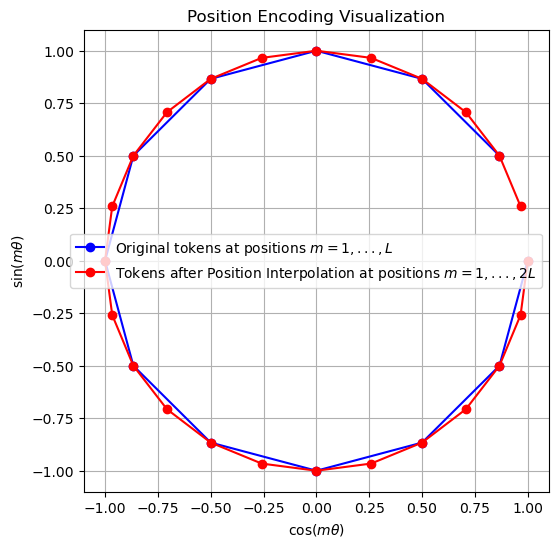

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the values for L and theta
L = 12
theta = 2 * np.pi / L

# Calculate original token positions
original_positions = np.arange(1, L + 1)
cos_m_theta_original = np.cos(original_positions * theta)
sin_m_theta_original = np.sin(original_positions * theta)

# Calculate interpolated token positions
interpolated_positions = np.arange(1, 2 * L + 1)
cos_m_theta_interpolated = np.cos(interpolated_positions * theta / 2)
sin_m_theta_interpolated = np.sin(interpolated_positions * theta / 2)

# Plot the figure
plt.figure(figsize=(6, 6))
plt.plot(cos_m_theta_original, sin_m_theta_original, 'bo-', label='Original tokens at positions $m=1,...,L$')
plt.plot(cos_m_theta_interpolated, sin_m_theta_interpolated, 'ro-', label='Tokens after Position Interpolation at positions $m=1,...,2L$')
plt.xlabel(r'$\cos(m \theta)$')
plt.ylabel(r'$\sin(m \theta)$')
plt.legend()
plt.grid(True)
plt.title('Position Encoding Visualization')